<a href="https://colab.research.google.com/github/SnowTrash/pyHikethroug/blob/main/Practica_5_Regresion_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This Jupyter Notebook will consider the `diabetes` dataset from kaggle: https://www.kaggle.com/kandij/diabetes-dataset We will use logistic regression to classify subjects based on the input features; we will also evaluate our model with/without regularization.

Resources


https://github.com/spate6/Classification-with-Logistic-Regression


### Developed 3 ML models for predicting diabetes in pregnant women. 2 Logistic Regression and 1 Decision Tree Classifier Model. Trained and Tested our models and cleaned our data. Model 1 achieved 78% accuracy. Created visualizations to analyze the data. Leveraged Python and Jupyter Notebook.

https://github.com/tamerayoub/Predicting-Diabetes-Machine-Learning-Model


### This notebook show Data Visualisation and various Machine Learning Classification algorithms on a dataset. I use three different classification algorithms: (K Neighbors Classifier, SVM Classifier and Logistic Regression Classifier)


https://github.com/MalekDeminion/Pima-Indian-Diabetes-Dataset-Prediction

# **Este notebook no se hubiera logrado sin la contribución obtenida de los distintos repositorios para la estructura general y el abordaje del problema**

## Tema: Regresion logistica

#### un buen primer lugar para iniciar siempre es W3 schools

https://www.w3schools.com/python/python_ml_logistic_regression.asp


#### En este siguiente link con explicacion se usa el dataset de Pima Indiands Diabetes

https://www.datacamp.com/tutorial/understanding-logistic-regression-python



## Dataset a utilizar

1.- https://www.kaggle.com/datasets/kandij/diabetes-dataset



# Main Code

La meta del ejercicio es tomar el dataset que contiene los pacientes analizados y mediante una valoracion de los distintos campos (caracteristicas,variables) y el valor (binario) de la columna del diagnostico(variable dependiente?), el dataset es explicado en profundidad dentro de la plataforma Kaggle.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

import matplotlib.pyplot as plt

In [3]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### El cuaderno 1 corresponde a una actividad que traduciremos

¿Cuántas características/valores de entrada tiene este dataset?
  - R - Ocho de ellas

¿Cuál es la variable dependiente?
 - R - la nombrada como "Outcome".

¿Cuántas clases para la variable dependiente existen?
  - R - Dos Clases ,Diabetes (1) or NO Diabetes (0) (AKA clase binaria).

In [4]:
# Ahora para saber si los datos están balanceados

diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Es un dataset desbalanceado los clasificados como **Negativos** representan el 65.1% y los **Positivos** tan solo el 34.9%

### Split data

Split the data into train and test sets: Use train_test_split with random_state=0. Use 50% of the data for training and 50% for testing.

In [5]:
# Store the input values into a variable called "X" [ /4 marks]
# ****** your code here ******
X = diabetes.iloc[:,0:8].values

# Convert 0's and 1's to "Pos" and "Neg" class labels. Store the output class values into variable "y" [ /6 marks]
# ****** your code here ******
y = diabetes.Outcome.replace(to_replace=[0,1], value=['Neg', 'Pos'])
# print(y)

# Split your X and y data using train_test_split [ /2 marks]
# ****** your code here ******
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.5)

Consider sklearn's LogisticRegression class. Create a LogisticRegression object with penalty=none. Train and test this classifier using "Insulin" as the independent variable and "Outcome" as the dependent variable. Make a scatter plot of the points. Plot your prediction on the same graph.

# CUIDADO

## Los Lineplots que se utilizan en el codigo original utilizan las 2 variables en su ploteo tanto en la scatter plot como en ROC curves

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


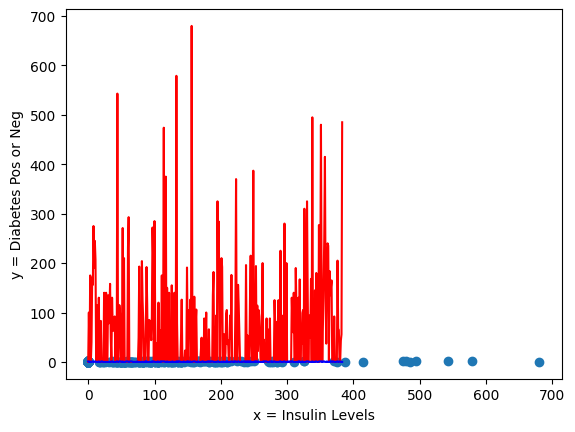

In [16]:
diabeteslr = LogisticRegression(penalty='none')

# Create training data and test data for X [ /4 marks]
# ****** your code here ******
X= diabetes.Insulin.values
y= diabetes.Outcome.values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.5)

# Fit to your training data using Logistic Regression [ /2 marks]
# ****** your code here ******
diabeteslr.fit(X_train.reshape(-1,1),y_train)

# Create a scatter plot of the test data. Also plot your prediction. [ /8 marks]
# ****** your code here ******
plt.scatter(X_test,y_test)
y_pred= diabeteslr.predict(X_test.reshape(-1,1))
sns.lineplot(X_test,color='red')
sns.lineplot(y_test,color='blue')
plt.xlabel("x = Insulin Levels")
plt.ylabel("y = Diabetes Pos or Neg")

#for roc curve
y_test_prob1=diabeteslr.predict_proba(X_test.reshape(-1,1))

How many True Positives (TP), True Negatives (TN), False Negatives (FN), and False Positives (FP) were there from your classification test results in question 1.4? What was the test accuracy of your classifier? You can use the following formula:

\ Accuracy = \frac{TP + TN}{TP + TN + FP + FN}


In [17]:
# Calculate tp, tn, fp, fn, and test accuracy
# ****** your code here ******
def compute_performance(yhat, y, classes):
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    print("Accuracy:",accuracy)
# call function to get the values of TP TN FN FP
compute_performance(y_pred,y_test,diabeteslr.classes_)


tp: 6 tn: 248 fp: 5 fn: 125
Accuracy: 0.6614583333333334


What happens when the threshold is lowered from question 1.5 to question 1.6? Could one model be more useful than the other? Answer in a few sentences.

Your answer: In contract from Q1.5 to Q1.6, the True Positive cases went up by a significant amount, i.e. from 6 to 58, where as the True Negative cases dropped from 248 to 174. Additionally, the False Positive and Flase negative cases differ significantly. Finally, the accuracy dropped from 0.661 to 0.604, which indicated that the accuracy lowered with lowering the decision threshold. Yes, in this perticular case, the Flase Negative values are to be noted, as there are more patients being wrongfully diagnosed with diabetes, I believe that the model in Q1.7 fits better to our scenario as the Flase Negative are significantly lower.



---



---



## Create another LogisticRegression object with penalty=none. Train and test this classifier, this time using all input features. Calculate TP, FP, TN, FN, and Accuracy.

In [18]:
X = diabetes.iloc[:,0:8].values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.5)
# Create a LogisticRegression object without regularization [ /2 marks]
# ****** your code here ******
diabeteslr_f = LogisticRegression(penalty='none',max_iter=10000)

# Fit to your training data using Logistic Regression [ /2 marks]
# ****** your code here ******
diabeteslr_f.fit(X_train,y_train)

# Compute your test predictions, given the test inputs [ /2 marks]
# ****** your code here ******
y_pred= diabeteslr_f.predict(X_test)

# Calculate tp, tn, fp, fn, and test accuracy [ /12 marks]
# ****** your code here ******
compute_performance(y_pred,y_test,diabeteslr_f.classes_)

#for roc curve
y_test_prob2=diabeteslr_f.predict_proba(X_test)

tp: 75 tn: 228 fp: 25 fn: 56
Accuracy: 0.7890625


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


## Create a final LogisticRegression object with penalty=l2, C=0.01. Train and test this classifier using all input features. Calculate TP, FP, TN, FN, and Accuracy. Did regularization help in this case?

In [19]:
diabeteslr_ff = LogisticRegression(max_iter=10000,penalty="l2",C=0.01)
# Fit to your training data using Logistic Regression [ /2 marks]
# ****** your code here ******
diabeteslr_ff.fit(X_train,y_train)
# Compute your test predictions, given the test inputs [ /2 marks]
# ****** your code here ******
y_pred= diabeteslr_ff.predict(X_test)
# Calculate tp, tn, fp, fn, and test accuracy [ /12 marks]
# ****** your code here ******
compute_performance(y_pred,y_test,diabeteslr_ff.classes_)

#for roc curve
y_test_prob3=diabeteslr_ff.predict_proba(X_test)

tp: 74 tn: 228 fp: 25 fn: 57
Accuracy: 0.7864583333333334


Your answer: The finaly accuracy values are similar with and without regularization. The confusion matrix values are similar as well. There isnt much of a notable positive difference. In conclusion, No, regularization did not help in this case.

Plot ROC Curves for the classifiers you used in questions 1.4, 1.8, and 1.9. Use AUC to determine which classifier is the best. State the best classifier.

0.5322994297438373
0.848082551368313
0.8391213830974866


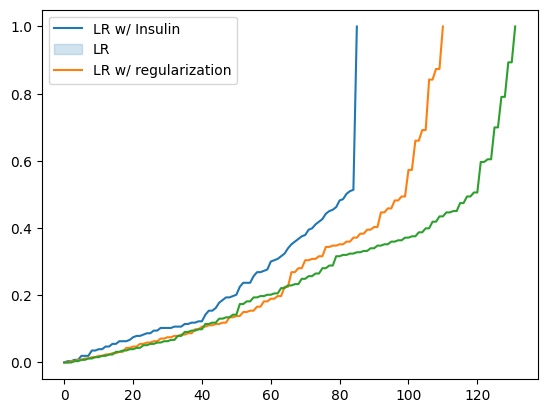

In [27]:
# Use roc_curve to get FPR and TPR for each of the 3 classifiers [ /6 marks]
# ****** your code here ******
fpr1,tpr1,_=roc_curve(y_test,y_test_prob1[:,1])
fpr2,tpr2,_=roc_curve(y_test,y_test_prob2[:,1])
fpr3,tpr3,_=roc_curve(y_test,y_test_prob3[:,1])

# Plot all of the ROC curves [ /3 marks]
# ****** your code here ******
sns.lineplot(fpr1,)
sns.lineplot(fpr2,)
sns.lineplot(fpr3)

# Determine AUC for each of the ROC curves [ /3 marks]
# ****** your code here ******
print(auc(fpr1,tpr1))
print(auc(fpr2,tpr2))
print(auc(fpr3,tpr3))
plt.legend(["LR w/ Insulin","LR","LR w/ regularization"])
plt.show()

Your answer: Based on the above ROC curves, The orange ROC curve (Q1.8) fits best and thus it's the best classifier.

## Ahora vamos con el segundo cuaderno

## ¿Qué es una regresión logística?

- R : Método estadístico de predicción de clases binarias

Where, y is a dependent variable and x1, x2 ... and Xn are explanatory variables.

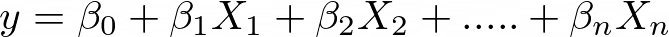

Ahora debemos aplicar una función sigmoide a dicha regresión

Sigmoid Function:

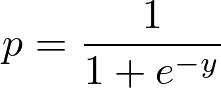

Apply Sigmoid function on linear regression:

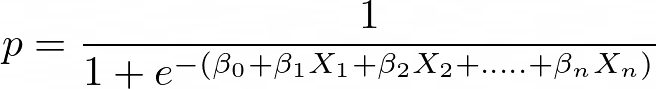

Properties of Logistic Regression:

The dependent variable in logistic regression follows Bernoulli Distribution.
Estimation is done through maximum likelihood.
No R Square, Model fitness is calculated through Concordance, KS-Statistics

Regresion Lineal jr vs Regresión logística

Properties of Logistic Regression:

The dependent variable in logistic regression follows Bernoulli Distribution.
Estimation is done through maximum likelihood.
No R Square, Model fitness is calculated through Concordance, KS-Statistics

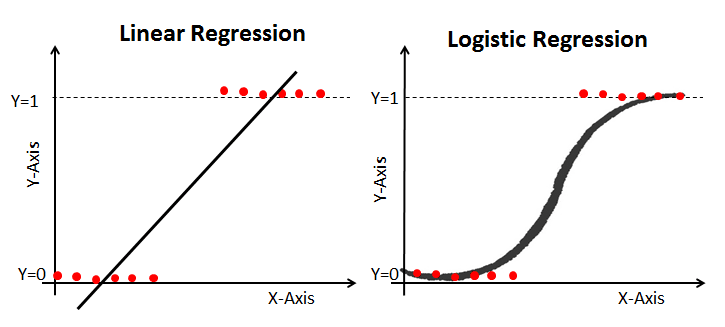

## **Maximum Likelihood Estimation Vs. Least Square Method**



The MLE is a "likelihood" maximization method, while OLS is a distance-minimizing approximation method. Maximizing the likelihood function determines the parameters that are most likely to produce the observed data. From a statistical point of view, MLE sets the mean and variance as parameters in determining the specific parametric values for a given model. This set of parameters can be used for predicting the data needed in a normal distribution.

Ordinary Least squares estimates are computed by fitting a regression line on given data points that has the minimum sum of the squared deviations (least square error). Both are used to estimate the parameters of a linear regression model. MLE assumes a joint probability mass function, while OLS doesn't require any stochastic assumptions for minimizing distance.


## **Sigmoid Function**

The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO. The outputcannotFor example: If the output is 0.75, we can say in terms of probability as: There is a 75 percent chance that a patient will suffer from cancer.

## Types of Logistic Regression:

- Binary Logistic Regression: The target variable has only two possible outcomes such as Spam or Not Spam, Cancer or No Cancer.
- Multinomial Logistic Regression: The target variable has three or more nominal categories such as predicting the type of Wine.
- Ordinal Logistic Regression: the target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5.

# EMPIEZA EL CODIGO DATACAMP

In [29]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [30]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


## **Splitting Data**

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using the function train_test_split(). You need to pass 3 parameters: features, target, and test_set size. Additionally, you can use random_state to select records randomly.


In [32]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)


Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

## **Model Development and Prediction**

First, import the Logistic Regression module and create a Logistic Regression classifier object using the LogisticRegression() function with random_state for reproducibility.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().




In [33]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **Model Evaluation using Confusion Matrix**

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions summed up class-wise.

In [35]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,   9],
       [ 26,  41]])

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 115 and 39 are actual predictions, and 30 and 8 are incorrect predictions.



---



Visualizing Confusion Matrix using Heatmap
Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, you will visualize the confusion matrix using Heatmap.

Text(0.5, 427.9555555555555, 'Predicted label')

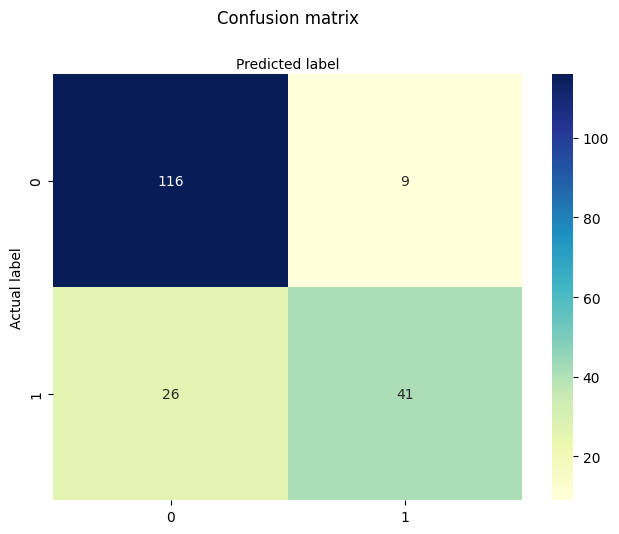

In [42]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


## Confusion Matrix Evaluation Metrics
Let's evaluate the model using classification_report for accuracy, precision, and recall.

In [43]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.61      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



Well, you got a classification rate of 80%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 73% of the time.

Recall: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 57% of the time.

## ROC Curve

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

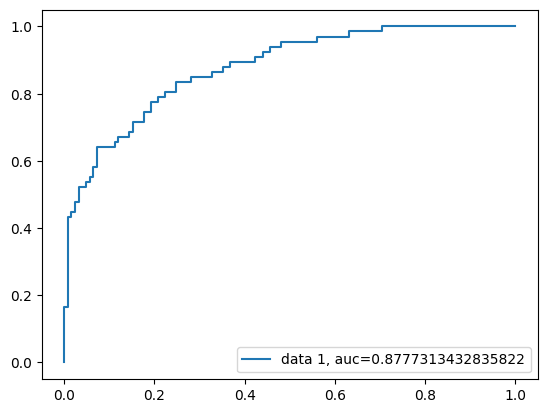

In [45]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.88. AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.

### Advantages
- Because of its efficient and straightforward nature, it doesn't require high computation power, is easy to implement, easily interpretable, and used widely by data analysts and scientists. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

### Disadvantages
- Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

### Conclusion
- In this tutorial, you covered a lot of details about Logistic Regression. You have learned what logistic regression is, how to build respective models, how to visualize results and some of the theoretical background information. Also, you covered some basic concepts such as the sigmoid function, maximum likelihood, confusion matrix, ROC curve.

- Hopefully, you can now utilize the Logistic Regression technique to analyze your own datasets. Thanks for reading this tutorial!



---



---



---



---



## AHORA USAMOS EL EJEMPLO DEL SEGUNDO GITHUB, TODO LO DE ARRIBA ES EL EJEMPLO DE DATACAMP

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
#g
import matplotlib.pyplot as plt
#m
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#n
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

#q
from sklearn.metrics import classification_report


#s
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.metrics import roc_curve, auc, roc_auc_score

 Load the dataset in Jupyter Notebook & Using head(), examine the data.

In [50]:
patients_data = pd.read_csv('diabetes.csv')
patients_data.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Provide mean, median, standard deviation, and quartiles for each independent variable. Explain your results.

In [53]:
statistics = patients_data.drop('Outcome', axis=1).describe(include='all')
q1 = patients_data.quantile(0.25)
q2 = patients_data.quantile(0.5)
q3 = patients_data.quantile(0.75)
q4 = patients_data.quantile(1)

# add quartiles to the statistics DataFrame
statistics.loc['25%'] = q1
statistics.loc['Median'] = q2
statistics.loc['75%'] = q3
statistics.loc['100%'] = q4

# display the updated statistics DataFrame
print(statistics)

        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count    768.000000  768.000000     768.000000     768.000000  768.000000   
mean       3.845052  120.894531      69.105469      20.536458   79.799479   
std        3.369578   31.972618      19.355807      15.952218  115.244002   
min        0.000000    0.000000       0.000000       0.000000    0.000000   
25%        1.000000   99.000000      62.000000       0.000000    0.000000   
50%        3.000000  117.000000      72.000000      23.000000   30.500000   
75%        6.000000  140.250000      80.000000      32.000000  127.250000   
max       17.000000  199.000000     122.000000      99.000000  846.000000   
Median     3.000000  117.000000      72.000000      23.000000   30.500000   
100%      17.000000  199.000000     122.000000      99.000000  846.000000   

               BMI  DiabetesPedigreeFunction         Age  
count   768.000000                768.000000  768.000000  
mean     31.992578                



---
Our count contains the number of rows per column, which is 786 for all columns. The average person in our data is 33 years old and the mean number of pregnancies is 3.85. When looking at our standard deviation for each of our independent variables, we can see that our standard deviation for Insulin, Glucose, and Blood pressure are the highest, which means these independent variables have more variance and are more spread out compared to the rest of the variables. We can also see that several of the variables have a minimum value of 0, which is not possible for something like skin thickness or blood pressure. This indicates that these variables have values that need to be replaced.


---




 ## Find missing values for each independent variable and fill them with median values

In [54]:
patients_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [55]:
zeros = (patients_data == 0).sum()
print('Zeros:')
print(zeros)

# create a list of all column names except "Diagnosis" and "Pregnancies"
cols_to_replace = [col for col in patients_data.columns if col not in ['Diagnosis', 'Pregnancies']]

# replace 0 with the corresponding column median in the selected columns
for col in cols_to_replace:
    median = patients_data[col].median()
    patients_data[col].replace(0, median, inplace=True)
print('After replacing zeros with median:')
print(patients_data)

zeros = (patients_data == 0).sum()
print('Updated Zeros:')
print(zeros)
# there was no missing data, only 0's, we replaced the 0's instead
# we didnt replace the 0's for pregnancies because pregnancies is past tense and women can currently be pregnant

Zeros:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64
After replacing zeros with median:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5 

## **There was no missing data, only 0's, so we replaced the 0's instead. For the future, we wouldn't want to replace all of the pregnancy 0 values with the median.**

In [56]:
patients_data.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


 # Find outliers for each independent variable using the IQR rule.

In [57]:
Q1 = patients_data.quantile(.25)
Q3 = patients_data.quantile(.75)

IQR = Q3 - Q1;


outliers = {}
for col in patients_data.columns:
    outliers[col] = patients_data[(patients_data[col] < (Q1[col] - 1.5 * IQR[col])) | (patients_data[col] > (Q3[col] + 1.5 * IQR[col]))][col]

# print the outliers for each column
for col, vals in outliers.items():
    print(f'Outliers for {col}:')
    print(vals)

# The row corresponds to the outlier it contains

Outliers for Pregnancies:
88     15
159    17
298    14
455    14
Name: Pregnancies, dtype: int64
Outliers for Glucose:
Series([], Name: Glucose, dtype: int64)
Outliers for BloodPressure:
18      30
43     110
84     108
106    122
125     30
177    110
362    108
549    110
597     24
599     38
658    106
662    106
672    106
691    114
Name: BloodPressure, dtype: int64
Outliers for SkinThickness:
16     47
39     47
57     60
86     54
99     51
120    56
150    50
177    46
211    54
254     7
273    50
275    52
370    48
382     8
409    49
422    46
428    46
434     8
445    63
458    48
519     7
532    52
539    49
575    47
579    99
580    46
591    50
625    47
657    48
662    46
663    46
689    46
693    49
718    46
763    48
Name: SkinThickness, dtype: int64
Outliers for Insulin:
8      543.0
13     846.0
53     300.0
54     342.0
56     304.0
111    495.0
139    325.0
144    284.0
153    485.0
162    285.0
186    495.0
199    318.0
206    280.0
220    478.0
228    7

# Replace outliers with median values.-

In [58]:
#f Replace outliers with median values.
median = patients_data.median()

for col in patients_data.columns:
    if col not in ["Pedigree", "Pregnancies", "Skin Thickness", "Age", "Diagnosis"]:
        outliers_mask = (patients_data[col] < (Q1[col] - 1.5 * IQR[col])) | (patients_data[col] > (Q3[col] + 1.5 * IQR[col]))
        patients_data.loc[outliers_mask, col] = median[col]

patients_data.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.50,33.6,0.6270,50,1
1,1,85,66,29,30.50,26.6,0.3510,31,0
2,8,183,64,23,30.50,23.3,0.6720,32,1
3,1,89,66,23,94.00,28.1,0.1670,21,0
4,0,137,40,35,168.00,43.1,0.3725,33,1
5,5,116,74,23,30.50,25.6,0.2010,30,0
6,3,78,50,32,88.00,31.0,0.2480,26,1
7,10,115,72,23,30.50,35.3,0.1340,29,0
8,2,197,70,45,31.25,30.5,0.1580,53,1
9,8,125,96,23,30.50,32.0,0.2320,54,1


# Create a histogram for each variable to see distribution.

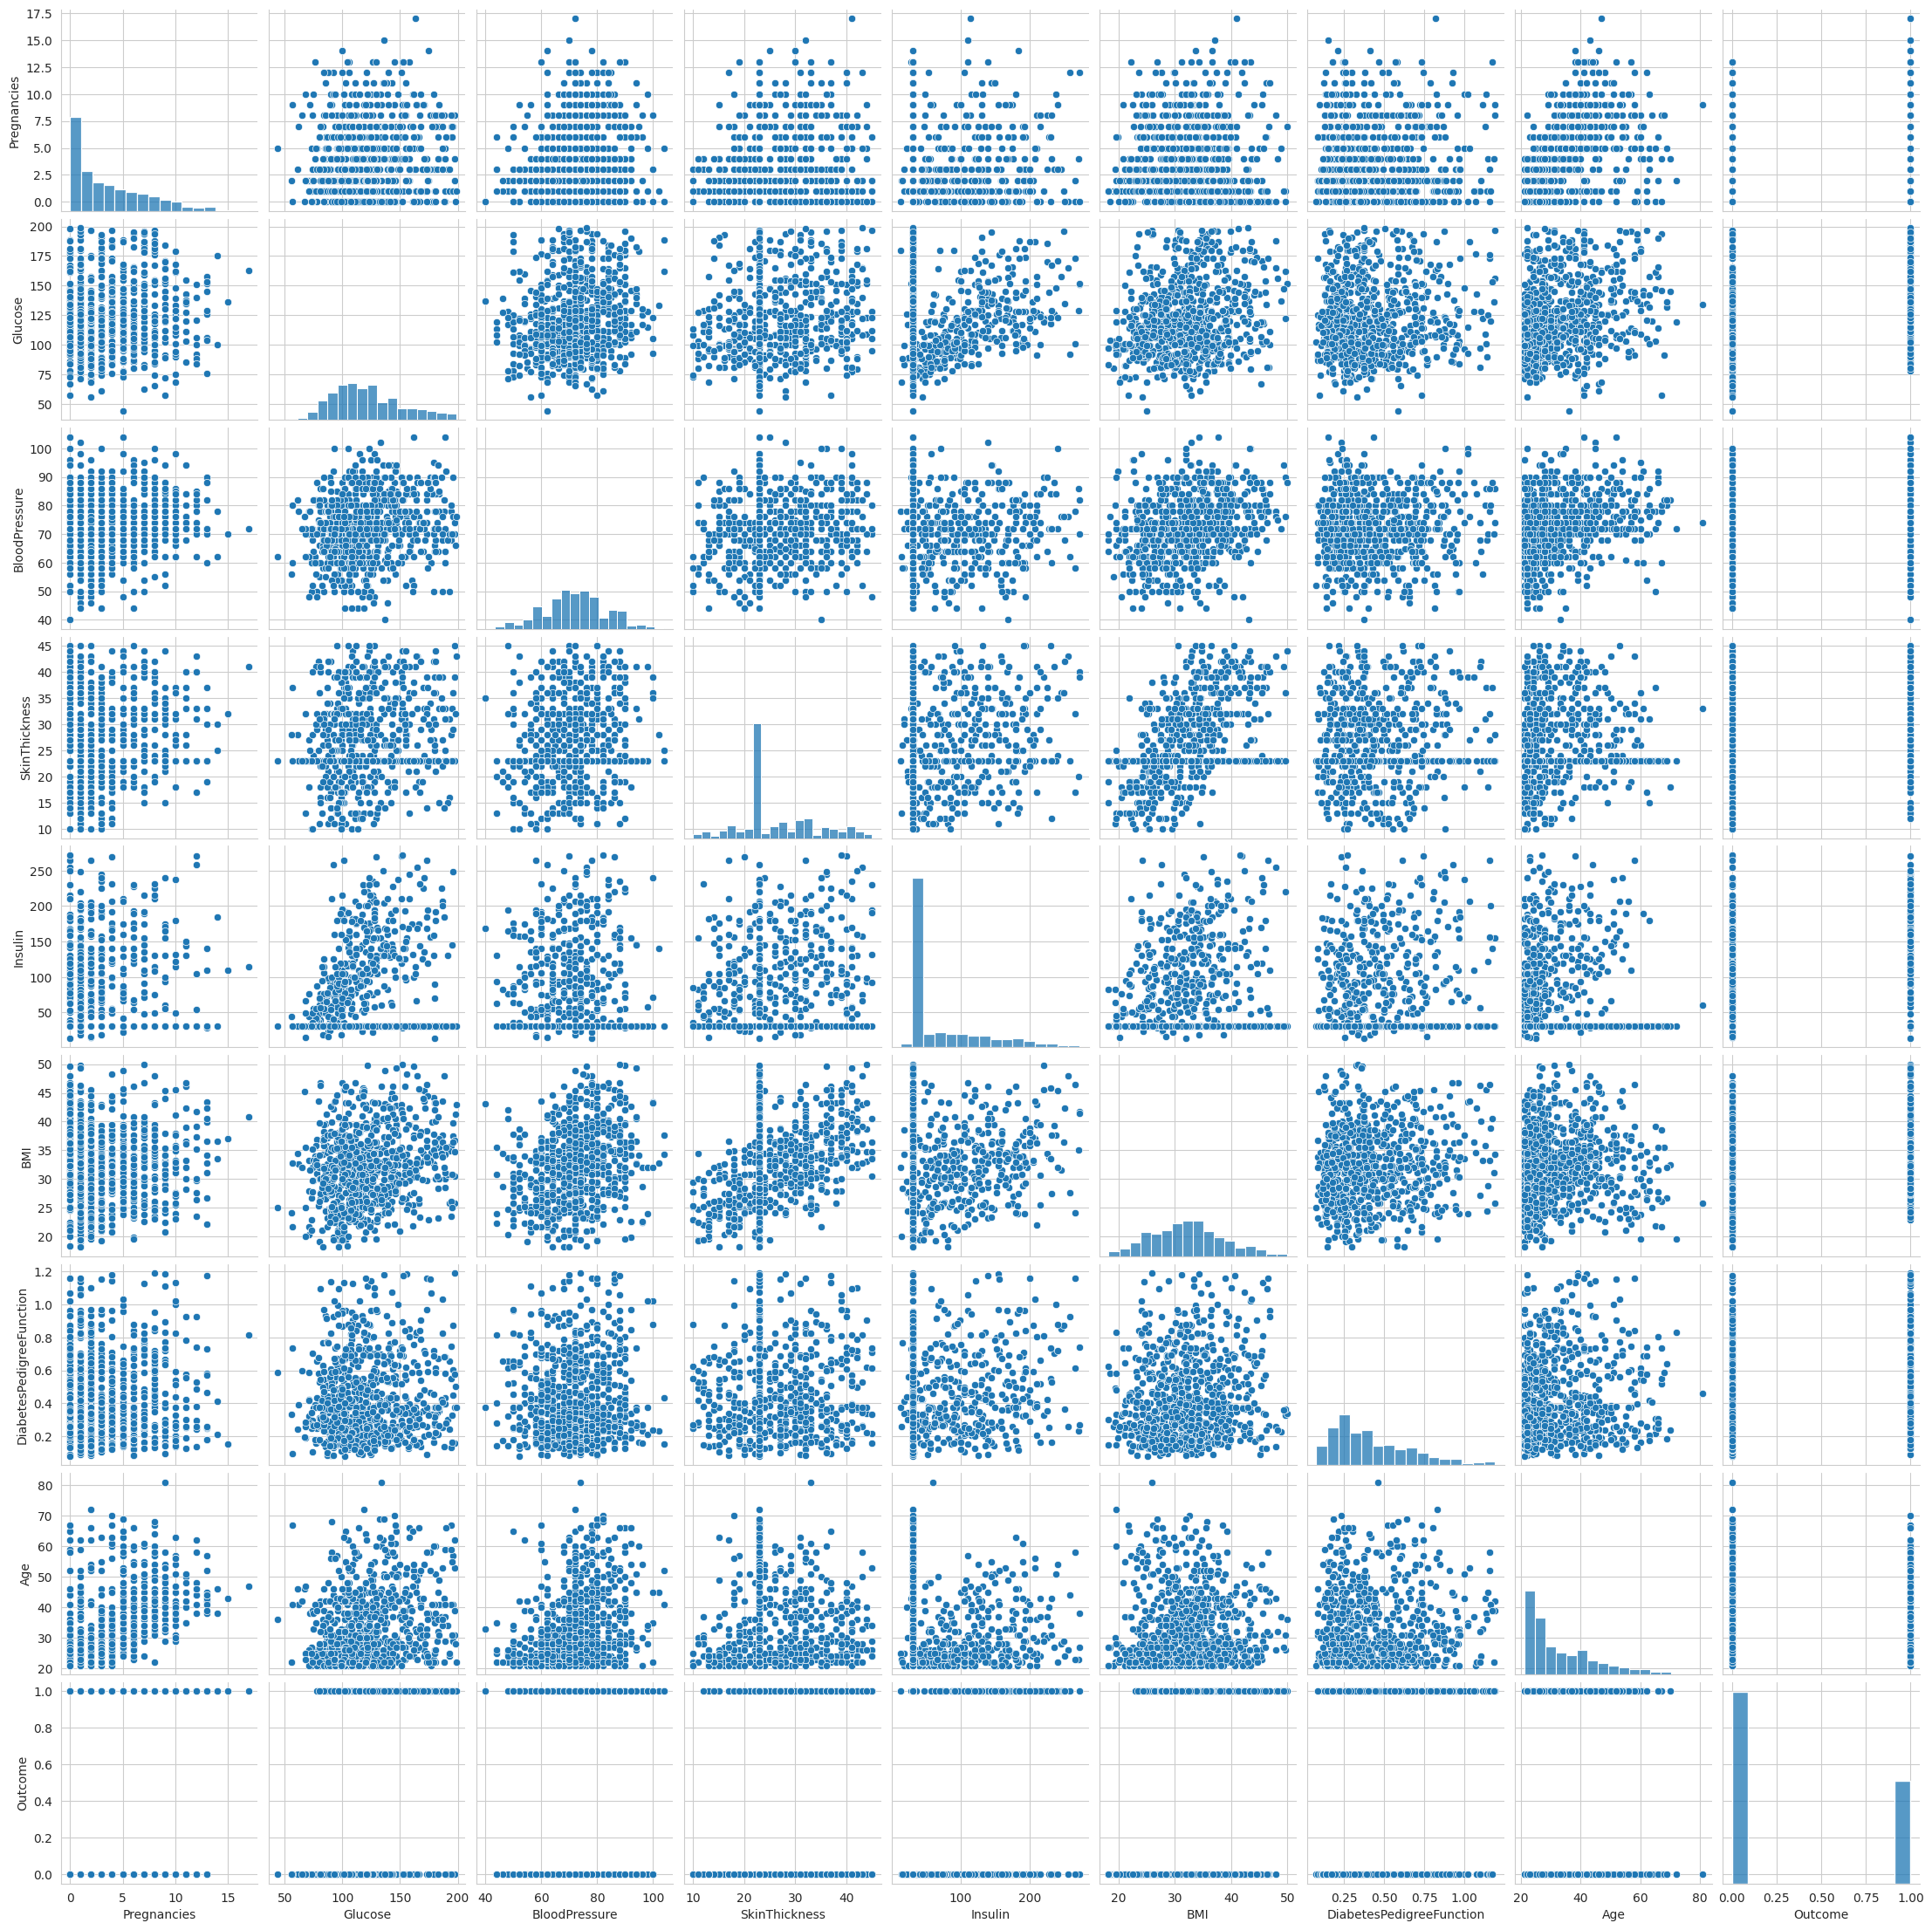

In [96]:
sns.pairplot(data = patients_data)

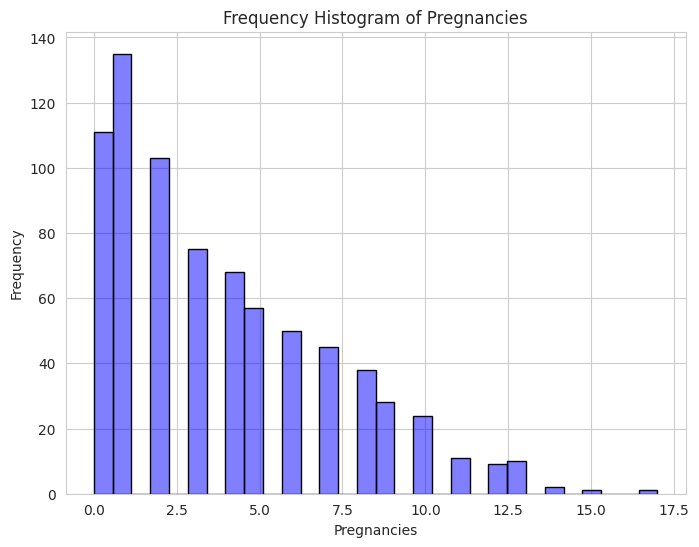

In [59]:
# Histogram for number of pregnancies.

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
pregnancies = patients_data['Pregnancies']
sns.histplot(pregnancies, bins=30, alpha=0.5, color='b', edgecolor='black')
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Pregnancies')
plt.show()

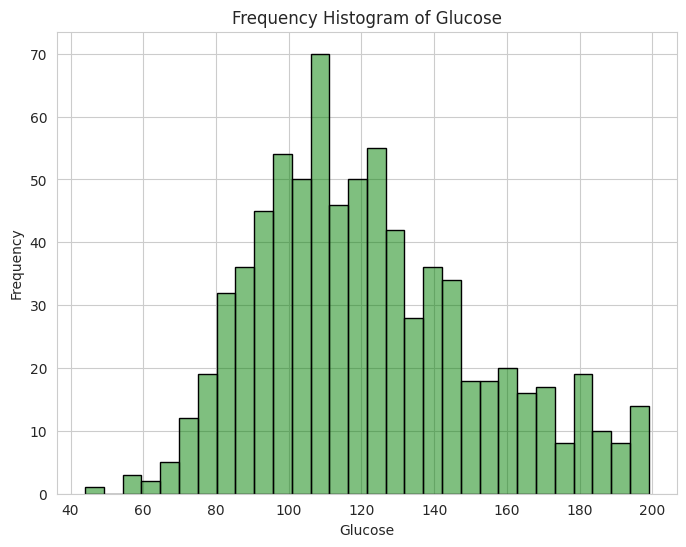

In [60]:

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
glucose = patients_data['Glucose']
sns.histplot(glucose, bins=30, alpha=0.5, color='g', edgecolor='black')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Glucose')
plt.show()

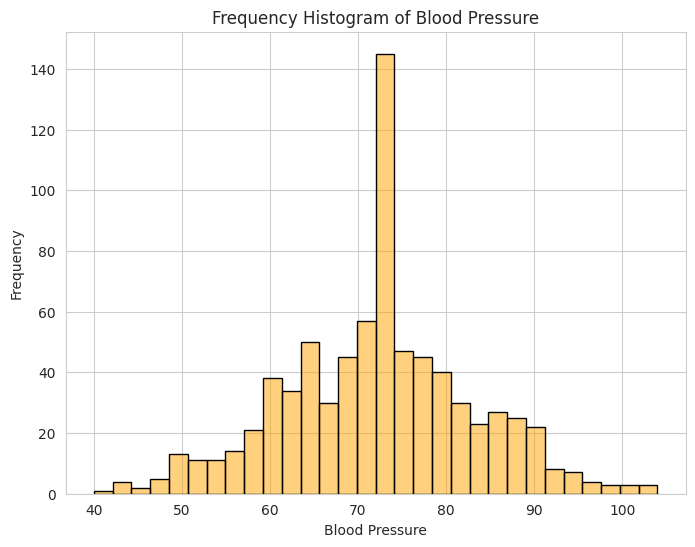

In [61]:
# Histogram for blood pressure levels.

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
bloodpressure = patients_data['BloodPressure']
sns.histplot(bloodpressure, bins=30, alpha=0.5, color='orange', edgecolor='black')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Blood Pressure')
plt.show()

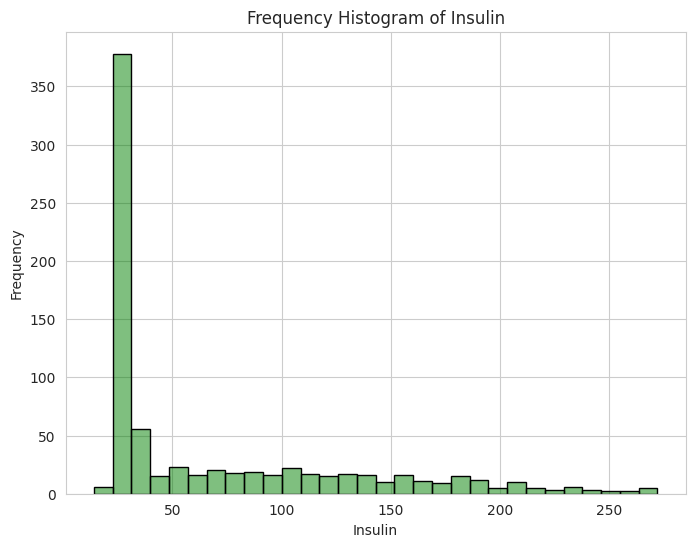

In [62]:
# Histogram for insulin levels


plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
insulin = patients_data['Insulin']
sns.histplot(insulin, bins=30, alpha=0.5, color='g', edgecolor='black')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Insulin')
plt.show()


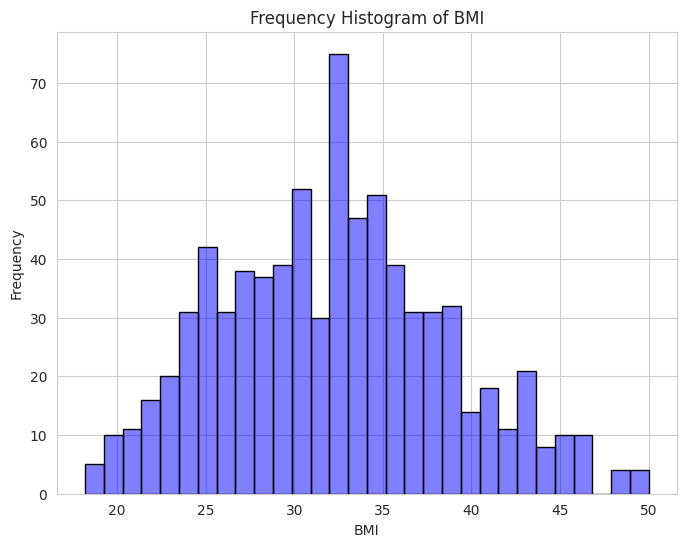

In [63]:
# Histogram for BMI

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
bmi = patients_data['BMI']
sns.histplot(bmi, bins=30, alpha=0.5, color='b', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of BMI')
plt.show()

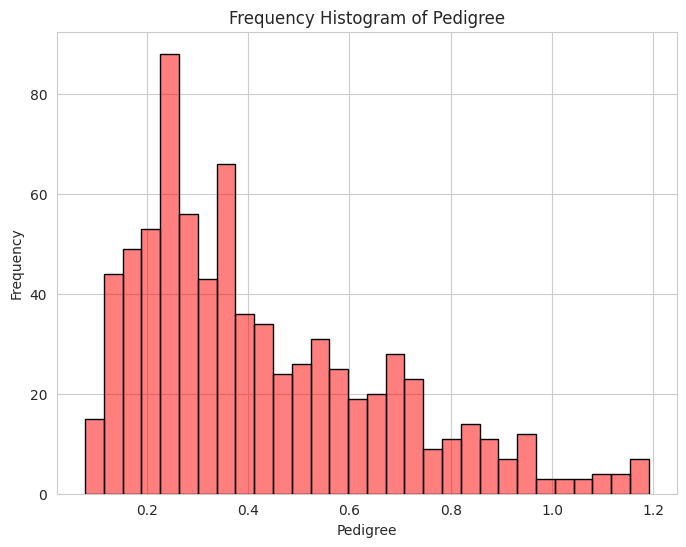

In [65]:
# Histogram for pedigree

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
pedigree = patients_data['DiabetesPedigreeFunction']
sns.histplot(pedigree, bins=30, alpha=0.5, color='r', edgecolor='black')
plt.xlabel('Pedigree')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Pedigree')
plt.show()

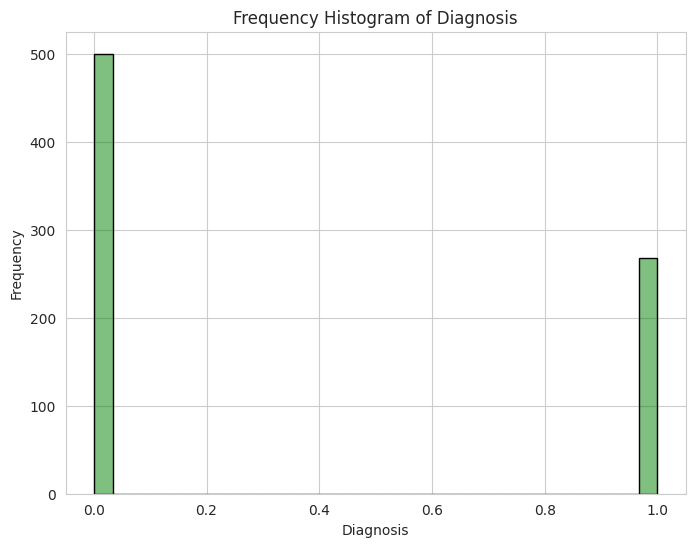

In [66]:
# Histogram for diagnosis

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
diagnosis = patients_data['Outcome']
sns.histplot(diagnosis, bins=30, alpha=0.5, color='g', edgecolor='black')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Diagnosis')
plt.show()


## Explain the histograms.

### We created histograms for each variable to see how frequent each variable was and to use our data visualization techniques to make sure our data is clean and ready to be analyzed effeciently. We see that there are more people in our data without diabetes than with diabetes. We can confirm that Insulin, Glucose and Blood Pressure have the most variance compared to the other variables. For most of the variables, the distribution is normal. However, the histograms for Skin Thickness, Insulin, and Pedigree are skewed to the right. We can also see that most of the women in this dataset are in their 20's and 30's and have had between 0 - 3 pregnancies. If we look at the histogram for BMI, it peaks between 30 - 35, which is within the obesity range. If we look at the histogram for diagnosis, we can see that the women in our dataset our much more likely to be classified as class 0, not diabetic. This indicates that our dataset is imbalanced towards class 0.



---



> Create a boxplot for each of the varibles.

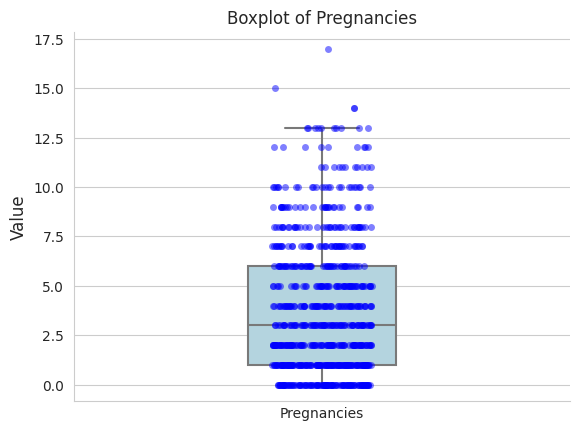

In [67]:
pregnancies = patients_data['Pregnancies']
ax = sns.boxplot(data=pregnancies, color='lightblue', width=0.3, showfliers=False)
sns.stripplot(data=pregnancies, color='blue', size=5, alpha=0.5)
sns.despine()
ax.set_xlabel('Pregnancies', fontsize=10)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Boxplot of Pregnancies', fontsize=12)
ax.set_xticks([]) # removes the 0 from x axis
ax.set_xticklabels([])
plt.show()

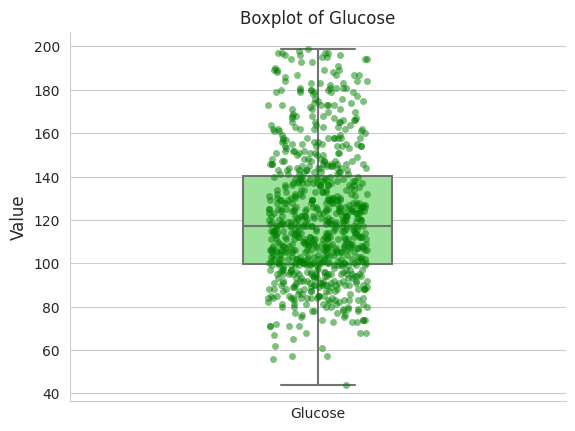

In [68]:
glucose = patients_data['Glucose']
ax = sns.boxplot(data=glucose, color='lightgreen', width=0.3, showfliers=False)
sns.stripplot(data=glucose, color='green', size=5, alpha=0.5)
sns.despine()
ax.set_xlabel('Glucose', fontsize=10)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Boxplot of Glucose', fontsize=12)
ax.set_xticks([]) # removes the 0 from x axis
ax.set_xticklabels([])
plt.show()

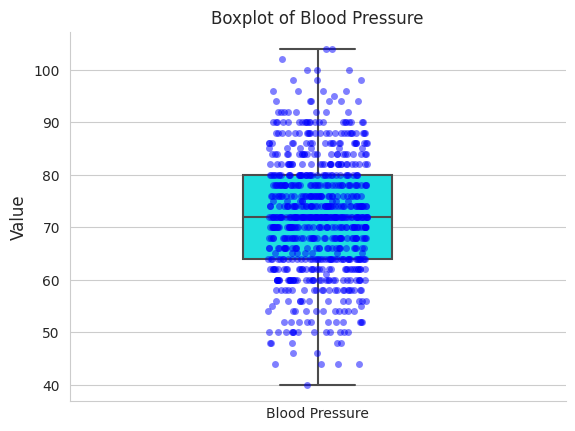

In [69]:
bloodpressure = patients_data['BloodPressure']
ax = sns.boxplot(data=bloodpressure, color='cyan', width=0.3, showfliers=False)
sns.stripplot(data=bloodpressure, color='blue', size=5, alpha=0.5)
sns.despine()
ax.set_xlabel('Blood Pressure', fontsize=10)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Boxplot of Blood Pressure', fontsize=12)
ax.set_xticks([]) # removes the 0 from x axis
ax.set_xticklabels([])
plt.show()

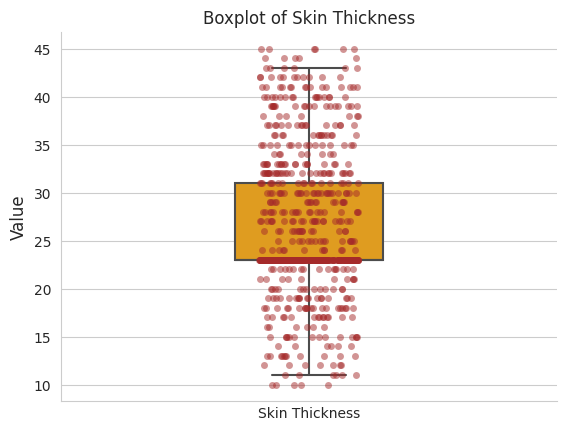

In [70]:
skinthickness = patients_data['SkinThickness']
ax = sns.boxplot(data=skinthickness, color='orange', width=0.3, showfliers=False)
sns.stripplot(data=skinthickness, color='brown', size=5, alpha=0.5)
sns.despine()
ax.set_xlabel('Skin Thickness', fontsize=10)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Boxplot of Skin Thickness', fontsize=12)
ax.set_xticks([]) # removes the 0 from x axis
ax.set_xticklabels([])
plt.show()

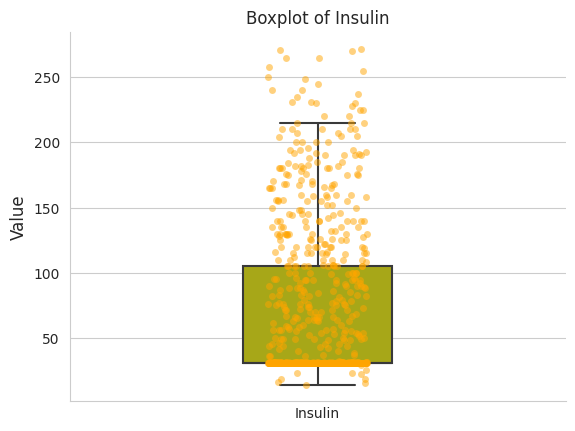

In [71]:
insulin = patients_data['Insulin']
ax = sns.boxplot(data=insulin, color='y', width=0.3, showfliers=False)
sns.stripplot(data=insulin, color='orange', size=5, alpha=0.5)
sns.despine()
ax.set_xlabel('Insulin', fontsize=10)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Boxplot of Insulin', fontsize=12)
ax.set_xticks([]) # removes the 0 from x axis
ax.set_xticklabels([])
plt.show()

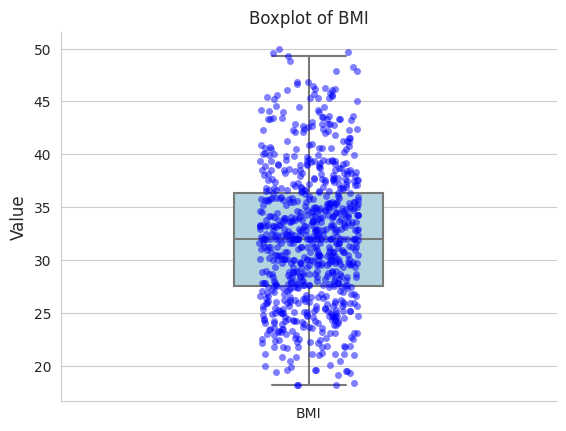

In [72]:
bmi= patients_data['BMI']
ax = sns.boxplot(data=bmi, color='lightblue', width=0.3, showfliers=False)
sns.stripplot(data=bmi, color='blue', size=5, alpha=0.5)
sns.despine()
ax.set_xlabel('BMI', fontsize=10)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Boxplot of BMI', fontsize=12)
ax.set_xticks([]) # removes the 0 from x axis
ax.set_xticklabels([])
plt.show()

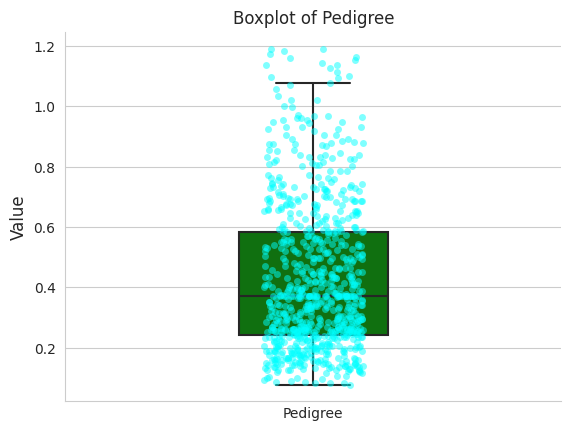

In [74]:
pedigree = patients_data['DiabetesPedigreeFunction']
ax = sns.boxplot(data=pedigree, color='green', width=0.3, showfliers=False)
sns.stripplot(data=pedigree, color='cyan', size=5, alpha=0.5)
sns.despine()
ax.set_xlabel('Pedigree', fontsize=10)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Boxplot of Pedigree', fontsize=12)
ax.set_xticks([]) # removes the 0 from x axis
ax.set_xticklabels([])
plt.show()

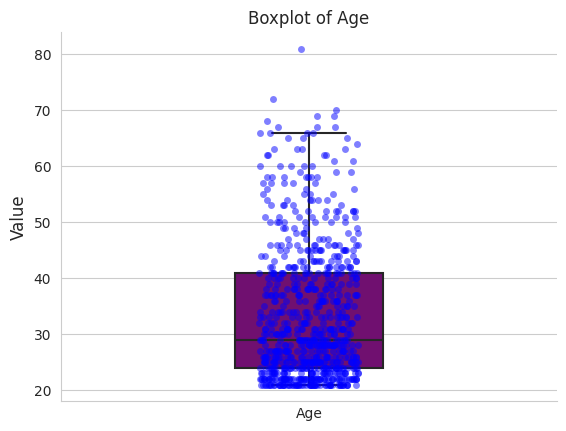

In [75]:
age = patients_data['Age']
ax = sns.boxplot(data=age, color='purple', width=0.3, showfliers=False)
sns.stripplot(data=age, color='blue', size=5, alpha=0.5)
sns.despine()
ax.set_xlabel('Age', fontsize=10)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Boxplot of Age', fontsize=12)
ax.set_xticks([]) # removes the 0 from x axis
ax.set_xticklabels([])
plt.show()

## Explain the boxplots

The boxplot is a way to measure the median, which is represented inbetween the 1st quartile and the 3rd quartile. The box plot extends beyone the IQR (50% range) and displays a pair of whiskers on each side, where everything beyond this point is considered an outlier. Blood pressure, glucose, and pregnancies do not contain any outliers. The median is roughly centered in the boxplots for BMI, blood pressure, and glucose. This indicates that the data is roughly symmetric.

## Create a heat map to see the correlation between variables using seaborn. Which varibles are most correlated?

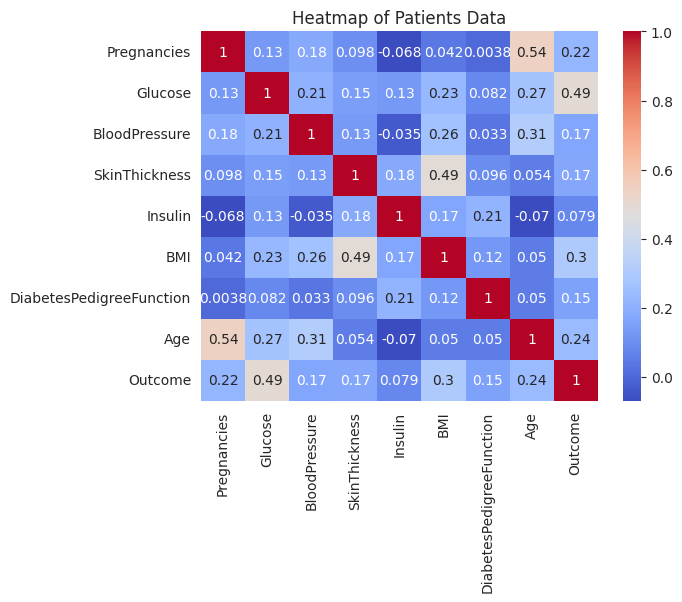

In [76]:
sns.heatmap(patients_data.corr(), cmap='coolwarm', annot=True)

plt.title('Heatmap of Patients Data')

plt.show()

<Axes: xlabel='Outcome', ylabel='Age'>

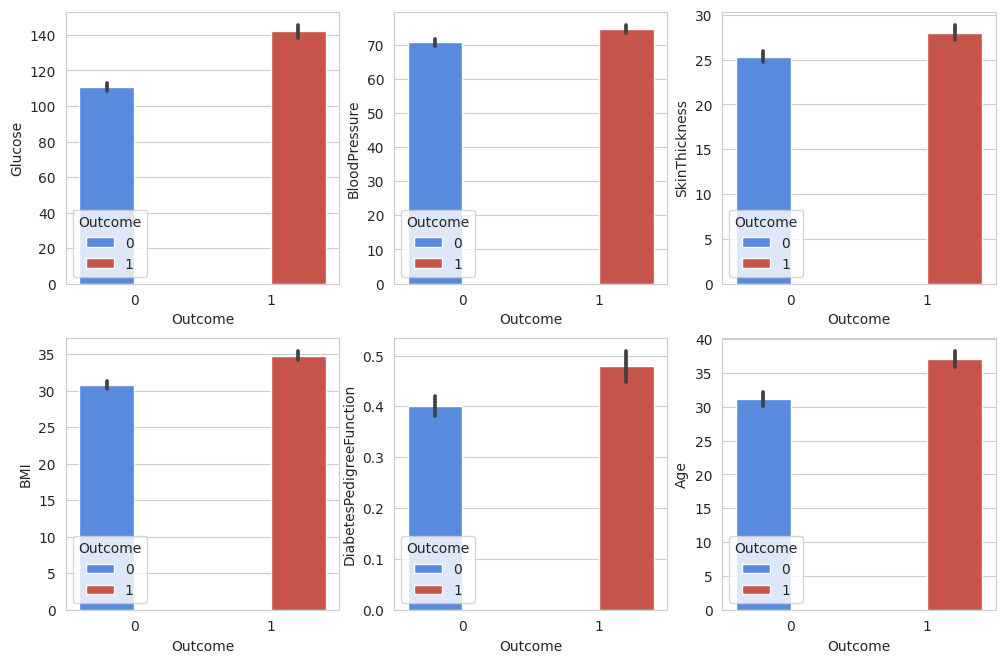

In [83]:
# BONUS VISUALIZATIONS BAR/SUB-PLOT
custom_palette = sns.color_palette(["#4285F4", "#DB4437"])
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.barplot(x='Outcome',y='Glucose',data=patients_data,hue="Outcome", palette=custom_palette)
plt.subplot(3,3,2)
sns.barplot(x='Outcome',y='BloodPressure',data=patients_data,hue="Outcome", palette=custom_palette)
plt.subplot(3,3,3)
sns.barplot(x='Outcome',y='SkinThickness',data=patients_data,hue="Outcome", palette=custom_palette)
plt.subplot(3,3,4)
sns.barplot(x='Outcome',y='BMI',data=patients_data,hue="Outcome", palette=custom_palette)
plt.subplot(3,3,5)
sns.barplot(x='Outcome',y='DiabetesPedigreeFunction',data=patients_data,hue="Outcome", palette=custom_palette)
plt.subplot(3,3,6)
sns.barplot(x='Outcome',y='Age',data=patients_data,hue="Outcome", palette=custom_palette)


# We new insight: we have information about women are who diabetic, than not diabetic, but our model is better at predicting
# who are not-diabetic?

# The variables that are most correlated are Pregnancies and Age, Diagnosis and Glucose, Diagnosis and BMI, and BMI and SkinThickness.



---



---



Find the best performing features using feature extraction in scikit Learn.

---



In [85]:
X = patients_data.drop(columns = ['Outcome'], axis=1)
Y = patients_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
selector = SelectKBest(score_func=f_classif, k=3) # k=3 is how many of the top features we our model to use to predict/test our results
selector.fit(X_train, y_train)

X_train_transformed = selector.transform(X_train)
X_test_transformed = selector.transform(X_test)


model = LogisticRegression()
model.fit(X_train_transformed, y_train)

# Evaluate model on transformed testing set
score = model.score(X_test_transformed, y_test)

print(f'Test accuracy using top 3 features: {score:.2f}')
selected_features = X_train.columns[selector.get_support()]
print("Selected top 3 features:", selected_features)
# Top selected Features include Glucose, BMI, and AGE

Test accuracy using top 3 features: 0.74
Selected top 3 features: Index(['Glucose', 'BMI', 'Age'], dtype='object')




---
### Standardize your features to Gaussian distribution. and Split the dataset into 60/40 training and testing.


---





In [87]:
X = patients_data.drop(columns = ['Outcome'], axis=1)
Y = patients_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
selector = SelectKBest(score_func=f_classif, k=3) # k=3 is how many of the top features we our model to use to predict/test our results
selector.fit(X_train, y_train)

X_train_transformed = selector.transform(X_train)
X_test_transformed = selector.transform(X_test)


# Standardizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)



# Transform the data to a Gaussian distribution
pt = PowerTransformer(method='yeo-johnson', standardize=False)
X_train_gaussian = pt.fit_transform(X_train_scaled)
X_test_gaussian = pt.transform(X_test_scaled)

## Create a logistic regression model (call it LRM1) using your best features. Describe your model.

In [88]:
# Test it

LRM1 = LogisticRegression()
LRM1.fit(X_train_gaussian, y_train)

# Evaluate model on transformed testing set
score = LRM1.score(X_test_gaussian, y_test)

print(f'Test accuracy for LRM1 after STANDARDIZATION: {score:.2f}')
selected_features = X_train.columns[selector.get_support()]
print("Selected features for LRM1:", selected_features)

# This model takes into account our standardized guassian x_train and x_test distribution units
# using the 60/40 training and testing split we applied, 60% training and 40% testing, using the top

Test accuracy for LRM1 after STANDARDIZATION: 0.77
Selected features for LRM1: Index(['Glucose', 'BMI', 'Age'], dtype='object')


### Create classification report of your model


LRM1 Classification Report
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       206
           1       0.66      0.62      0.64       102

    accuracy                           0.77       308
   macro avg       0.74      0.73      0.74       308
weighted avg       0.77      0.77      0.77       308



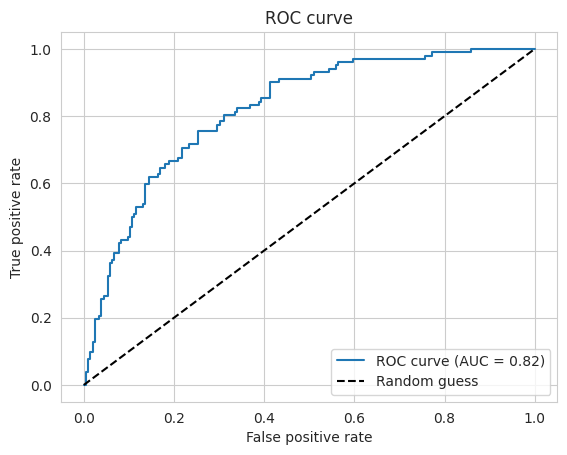

In [89]:
y_pred = LRM1.predict(X_test_gaussian)
print()
# create a classification report
print('LRM1 Classification Report')
print(classification_report(y_test, y_pred))

# The code below finds the ROC/AUC
# Predict probabilities for test set
y_proba = LRM1.predict_proba(X_test_gaussian)[:, 1]

# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate AUC score
auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

## Describe your classification report (precision, recall, F1 score, and support).

- Our total model accuracy is 78% accurate with its precision score being 82% right when predicting if someone is NOT diabetic and a precision score of 67% when predicting if someone DOES HAVE diabetes. Our total f1-score, which is the weighted average of the precision and recall, is 84% correct when predicting if someone is not-diabetic, and 65% correct on average when predicting if someone IS DIABETIC. We are dealing with 308 total support, which 206 support are for non-diabetic, and 102 support are for diabetic positive. Our precision, F1 score and recall scores were alot better predicting if someone was NOT-diabetic



---



---



### Create the accuracy score of your model. Describe the accuracy score.

In [90]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score for LRM1:', accuracy)

Accuracy score for LRM1: 0.7694805194805194


The accuracy score measures how many instances we were able to predict correctly using the model ranging between 0 and 1, a higher score means your model predicted more successfuly. We ended up predicting 77% correct.

### Create another logistic regression model (call it LRM2). Use all of the independent variables or features this time (instead of your best performing features).

Test accuracy for LRM2: 0.78
ALL features included for LRM2: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

LRM2 Classification Report
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.66      0.66       102

    accuracy                           0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



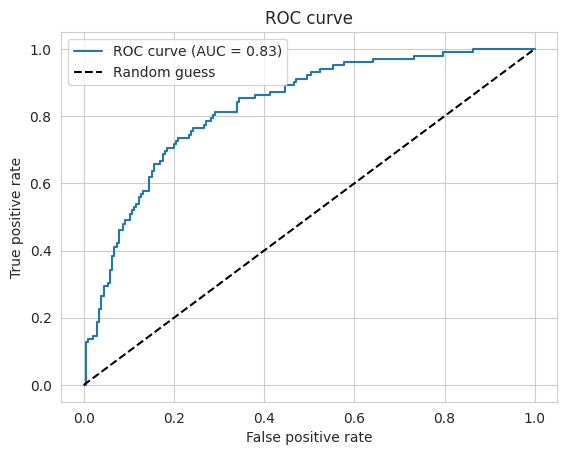

In [92]:
X = patients_data.drop(columns = ['Outcome'], axis=1)
Y = patients_data['Outcome']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.4, random_state=42)
selector = SelectKBest(score_func=f_classif, k=8) # k=8 uses all of the independent variables in our modelto predict/test our results
selector.fit(X_train2, y_train2)

X_train_transformed2 = selector.transform(X_train2)
X_test_transformed2 = selector.transform(X_test2)


# Standardizing
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train_transformed2)
X_test_scaled2 = scaler.transform(X_test_transformed2)



# Transform the data to a Gaussian distribution
pt = PowerTransformer(method='yeo-johnson', standardize=False)
X_train_gaussian2 = pt.fit_transform(X_train_scaled2)
X_test_gaussian2 = pt.transform(X_test_scaled2)


# Test it
LRM2 = LogisticRegression()
LRM2.fit(X_train_gaussian2, y_train2)

# Evaluate model on transformed testing set
score = LRM2.score(X_test_gaussian2, y_test2)

print(f'Test accuracy for LRM2: {score:.2f}')
selected_features = X_train2.columns[selector.get_support()]
print("ALL features included for LRM2:", selected_features)


# create a classification report
y_pred2 = LRM2.predict(X_test_gaussian2)
print()
print('LRM2 Classification Report')
print(classification_report(y_test2, y_pred2))

# This model takes into account our standardarized guassian x_train and x_test distribution units
# using the 60/40 training and testing split we applied, 60% training and 40% testing, but this time, we
# used all of the features instead of the top 2. We ended up with the same accuracy score as LRM1.



# The code below finds the ROC/AUC
# Predict probabilities for test set
y_proba = LRM2.predict_proba(X_test_gaussian2)[:, 1]

# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test2, y_proba)

# Calculate AUC score
auc = roc_auc_score(y_test2, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Accuracy: 0.7207792207792207
Decision-Tree Classification Report
              precision    recall  f1-score   support

           0       0.78      0.79      0.78        99
           1       0.61      0.60      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



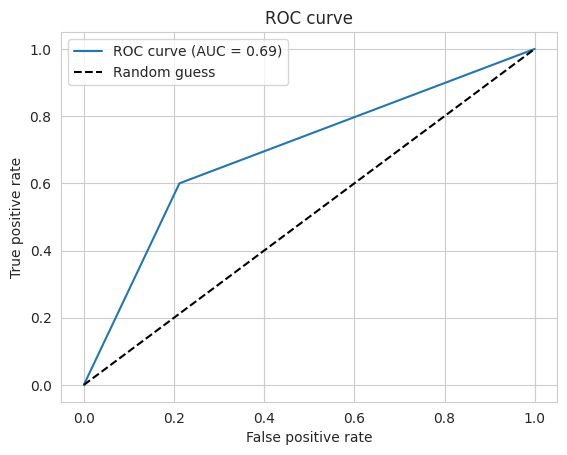

In [93]:
# This is a bonus model - Decision-Tree Classifier Model
X = patients_data.drop(columns = ['Outcome'], axis=1)
Y = patients_data['Outcome']
# testing 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print('Decision-Tree Classification Report')
print(classification_report(y_test, y_pred))


# The code below finds the ROC/AUC
# Predict probabilities for test set
y_proba = tree.predict_proba(X_test)[:, 1]

# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate AUC score
auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

### Compare the two models (LRM1 and LRM2) based on the classification report and accuracy score. Which one is a better model? Why?

- Based on our results, LRM1 and LRM2 both recieved overall accuracy scores of 78%, which means both models scored a similar accuracy when predicting what instances were actually correct. In both models, the F1-score for class 0, which is the average of precision and recall, is higher than the F1-score for class 1. This means that our models are better at identifying patients who are not diabetic compared to patients who are diabetic. This is likely due to the fact that our dataset is imbalanced towards class 0. We have a much higher sample of women who are class 0, which could explain why our model performs better for class 0 than it does for class 1. However, LRM2 does have a slightly higher F1-score for class 0 and it also has a higher AUC, making it a better model in this case.

## What would be your suggestions for further improving the accuracy of your chosen model?

- To further improve our model's accuracy, we can collect more data that has a high correlation to someone becoming diabetic. Our sample is also biased and imbalanced towards class 0 (not diabetic), so collecting more data using random sampling methods could help us acheive a higher accuracy. Since our goal is to identify women who have a greater likelihood of developing gestational diabetes, improving the performance of class 1 would be beneficial. We can also re-visualize and re-select our best features that we want to take in account and continue to experiment with different features, and we can re-clean our data being more distinct in what values get dropped or replaced, also making sure the right outliers are replaced/deleted. Running the data through more visualizations will help us as well.

## What would be the pitfalls or weaknesses of your model if the hospital decided to deploy it to predict diabetes?

- Some pitfalls and weaknesses of using our models include having to deal with patients' confidential personal health information, since HIPAA has restrictions on how we can use patient data, but also the overall model being not 100% accurate; this can lead to misdiagnosing patients with diabetes, creating law suits and major corporate consequences We also don't know the accuracy of our model on certain subgroups of patients. Some patients may be more likely to be misdiagnosed than others, which raises ethical concerns. In addition, our model will need to be routinely monitored to ensure that its accuracy is at an acceptable level. This will cost the hospital time and money. Our model is imbalanced towards class 0. It may have high specificity but low sensitivity towards non-diabetic women. So our model may be better at predicting non-diabetic individuals, but it may miss many diabetic individuals. In addition, our model does not account for all confounding variables, such as health, diet, exercise, and genetics. Our model is also not reflective of the entire population. On average, our data contained women who were 33 years old and likely prediabetic with slight obesity.

### If you were to present your analysis and findings to the CEO of the hospital, what would be your top five key points?

1.) Our model shows promising results with an overall accuracy score of 78%, but there is room for improvement. Since our model is not 100% accurate, there is always the risk of false positives and false negatives, and we need to consider the potential consequences of that. False positives could lead to patients recieving unecessary treatments, and false negatives could result in patients receiving a delayed diagnosis, allowing time for the disease to progress.

2.) We recommend collecting more data with additional features to improve the accuracy of our model. The sample size may not be large enough to detect a significant correlation between variables. With a small sample size, the correlation coefficient may be subject to greater variability and less reliable. Currently, we don’t have enough data.

3.) Given that logistic regression models base their predictions on probabilities, which means that there is always some degree of uncertainty in the forecasts, we advise using our model as a tool to assist clinical decision making rather than as a replacement. Keep in mind, our model is biased towards women who are mostly likely on average pre-diabetic, obese and 33 years old. (Should not be applied externally in other environments/populations.)

4.) The external validity of our findings may be limited due to the small sample size, not having a good enough random sample, and bias; so it may be difficult to apply our results to other populations.

5.) The F1-score is higher for class 0 in our model, indicating that it is better at identifying non-diabetic patients. This is likely due to our imbalanced dataset, so collecting more data could help with this as well.